In [1]:
import gdown
import zipfile
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
url = "https://drive.google.com/file/d/1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE/view?usp=sharing"

file_id = url.split("/")[-2]
file_id

'1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE'

In [3]:
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix + file_id, 'garbage.zip')

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE&confirm=t&uuid=838c0277-cd3b-4283-aefc-155c8cda9a42
To: /kaggle/working/garbage.zip
100%|██████████| 133M/133M [00:05<00:00, 23.0MB/s] 


'garbage.zip'

In [4]:
zip_path = "/kaggle/working/garbage.zip"
extract_path = ""

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete!")

Extraction complete!


In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

base_dir = "/kaggle/working/garbage"

def check_image_formats(base_dir, valid_exts):
    all_images_valid = True
    invalid_images = []

    for sub_dir in os.listdir(base_dir):
        sub_dir_path = os.path.join(base_dir, sub_dir)
        if not os.path.isdir(sub_dir_path):
            continue

        for file_name in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path, file_name)

            if os.path.isdir(file_path):
                continue

            file_ext = file_name.split('.')[-1].lower()
            if file_ext not in valid_exts:
                all_images_valid = False
                invalid_images.append(file_path)

    if all_images_valid:
        print("All images are in the specified formats.")
    else:
        print("The following images are not in the specified formats:")
        for img in invalid_images:
            print(img)

check_image_formats(base_dir, image_exts)


All images are in the specified formats.


In [6]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))

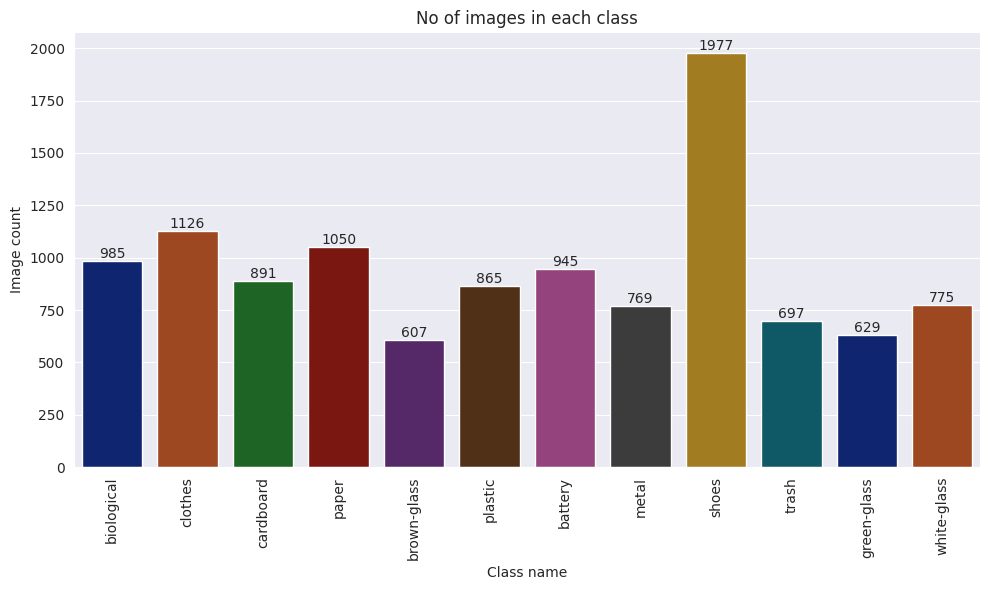

In [7]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
import random

base_path = "/kaggle/working/garbage"

for sub_dir in os.listdir(base_path):
    sub_dir_path = os.path.join(base_path, sub_dir)
    images = os.listdir(sub_dir_path)
    total_images = len(images)

    if total_images > 700:
        images_to_delete = total_images - 700

        for _ in range(images_to_delete):
            random_img = random.choice(images)
            delete_img = os.path.join(sub_dir_path, random_img)

            os.remove(delete_img)
            images.remove(random_img)

        print(f"Deleted {images_to_delete} images in {sub_dir}")
    else:
        print(f"No deletion needed in {sub_dir}")


Deleted 285 images in biological
Deleted 426 images in clothes
Deleted 191 images in cardboard
Deleted 350 images in paper
No deletion needed in brown-glass
Deleted 165 images in plastic
Deleted 245 images in battery
Deleted 69 images in metal
Deleted 1277 images in shoes
No deletion needed in trash
No deletion needed in green-glass
Deleted 75 images in white-glass


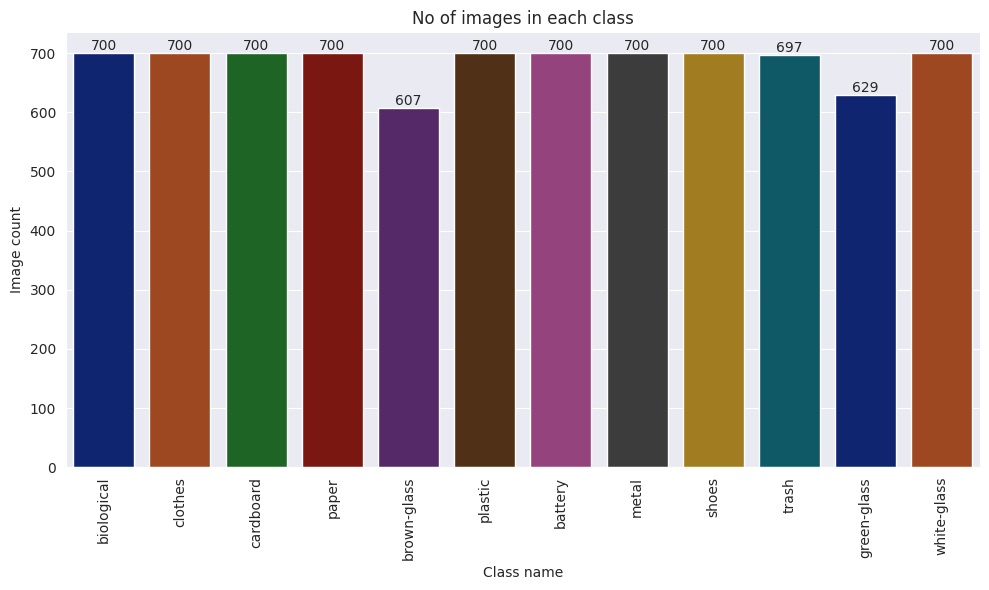

In [9]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))



plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/working/garbage',
    shuffle=True,
    image_size = (224,224),
    batch_size = 32,
    # label_mode='int'

)

Found 8233 files belonging to 12 classes.


In [12]:
class_names = dataset.class_names

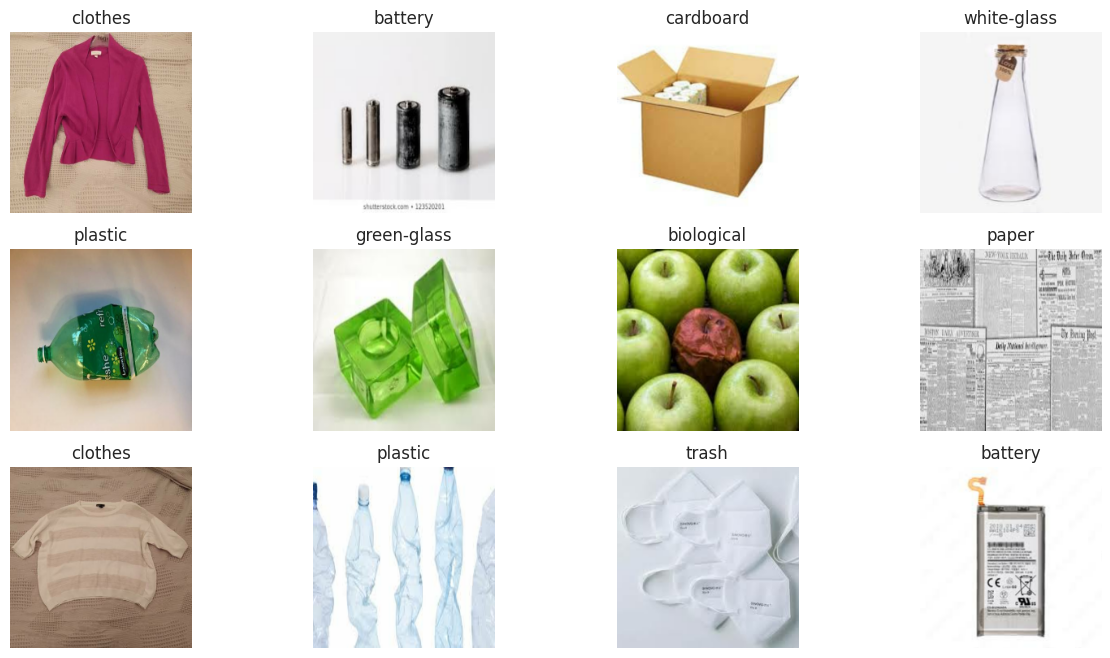

In [13]:
plt.figure(figsize=(15,8))

for image_batch, label_batch in dataset.take(1):

  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [14]:
len(dataset)

258

In [15]:
# # 75% -->training
# # 15% --> validation
# # 10% -->testing

# # print(int(len(dataset)*0.75))
# # print(int(len(dataset)*0.15))
# # print(int(len(dataset)*0.10))

# train_ds = dataset.take(193)
# val_ds = dataset.skip(193).take(38)
# test_ds = dataset.skip(231).take(25)

In [16]:
!pip install split-folders

In [17]:
import splitfolders

dataset_path = "/kaggle/working/garbage"

splitfolders.ratio(dataset_path, output="dataset_split", seed=42, ratio=(0.7,0.15,0.15) ,group_prefix=None)


print("Dataset successfully split into train, validation, and test sets.")

Copying files: 8233 files [00:01, 8095.67 files/s]

Dataset successfully split into train, validation, and test sets.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range = 0.2,
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    brightness_range=[0.9, 1.1],
    height_shift_range=0.2,
    fill_mode='nearest'

)

val_dategen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/dataset_split/train',
    target_size = (224,224),
    batch_size=32,
    class_mode="categorical",
    seed = 42,
    shuffle=True
)

val_generator = val_dategen.flow_from_directory(
    '/kaggle/working/dataset_split/val',
    target_size = (224,224),
    batch_size=32,
    class_mode="categorical",
    seed = 42,
    shuffle=True
)

Found 5752 images belonging to 12 classes.
Found 1234 images belonging to 12 classes.


In [19]:
print("Number of batches in train generator: ",len(train_generator))
print("Number of batches in validation generator: ",len(val_generator))

Number of batches in train generator:  180
Number of batches in validation generator:  39


In [20]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

xception_base = Xception(weights="imagenet",include_top=False, input_shape=(224,224,3))
xception_base.trainable=False

model = Sequential()
model.add(xception_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(12, activation="softmax"))

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [21]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,554,932 (177.59 MB)

 Trainable params: 25,693,452 (98.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [22]:
# from tensorflow.keras.callbacks import EarlyStopping

# callback = EarlyStopping(
#     monitor='val_loss',
#     min_delta=0.00001,
#     patience=5,
#     verbose=1,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=False
# )

In [23]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data = val_generator,
    # callbacks=callback
)

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 90s 430ms/step - accuracy: 0.6131 - loss: 1.2971 - val_accuracy: 0.8274 - val_loss: 0.5166
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 71s 378ms/step - accuracy: 0.7968 - loss: 0.6362 - val_accuracy: 0.8509 - val_loss: 0.4547
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 71s 377ms/step - accuracy: 0.8072 - loss: 0.5996 - val_accuracy: 0.8703 - val_loss: 0.4023
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 71s 378ms/step - accuracy: 0.8370 - loss: 0.4996 - val_accuracy: 0.8647 - val_loss: 0.3995
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 70s 376ms/step - accuracy: 0.8504 - loss: 0.4791 - val_accuracy: 0.8598 - val_loss: 0.4500
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 71s 381ms/step - accuracy: 0.8508 - loss: 0.4586 - val_accuracy: 0.8833 - val_loss: 0.3657
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 70s 374ms/step - accuracy: 0.8622 - loss: 0.4340 - val_accuracy: 0.8703 - val_loss: 0.4051
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 70s 372ms/step - accuracy: 0.8596 - loss: 0